

### Plotting time series for artificial surfaces



In [1]:
import sys
import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff
from datacube.utils.geometry import CRS
dc = datacube.Datacube(app="temporal analysis")
sys.path.append('../../../dea-notebooks/10_Scripts')

import DEADataHandling
import DEAPlotting
import BandIndices
import TasseledCapTools
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
Date = '2015'
res = (-25, 25)
time = ('2015-01-01', '2015-12-31')
crs = 'EPSG:3577'

# industrial areas have primarily white roofs
# urban areas are pixels of houses
# roads are primarily major roads
# bare areas were selected from large bare areas

Ayr = {'industrial': {'x':1539765.6 , 'y': -2150867.5, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 1541010.4, 'y': -2156367.2, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 1546245.3, 'y': -2157877.7, 'resolution': res, 'time': time, 'crs': crs},
        'bare': {'x': 1553683.6, 'y': -2158530.7, 'resolution': res, 'time': time, 'crs': crs}}

Diamantina = {'bare': {'x': 828325.1, 'y': -2745486.1, 'resolution': res, 'time': time, 'crs': crs}}

Gwydir = {'urban': {'x': 1693350.0, 'y': -3372460.7, 'resolution': res, 'time': time, 'crs': crs},
          'roads': {'x': 1693224.8, 'y': -3372119.8, 'resolution': res, 'time': time, 'crs': crs},
          'bare': {'x': 1693166.6, 'y': -3370353.0, 'resolution': res, 'time': time, 'crs': crs}}

Leichhardt = {'bare': {'x': 860154.9, 'y': -1922702.2, 'resolution': res, 'time': time, 'crs': crs}}

Kakadu = {'urban': {'x': 92867.9, 'y': -1337930.0, 'resolution': res, 'time': time, 'crs': crs},
          'roads': {'x': 91473.6, 'y': -1338069.8, 'resolution': res, 'time': time, 'crs': crs},
          'bare': {'x': 64611.3, 'y': -1278264.5, 'resolution': res, 'time': time, 'crs': crs}}

Hobart = {'industrial': {'x': 1285934.8, 'y': -4759513.7, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 1286934.3, 'y': -4760162.5, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 1287002.3, 'y': -4759404.8, 'resolution': res, 'time': time, 'crs': crs}}

Perth = {'industrial': {'x': -1502713.2, 'y': -3589838.4, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': -1513310.1, 'y': -3591884.0, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': -1505773.4, 'y': -3597048.2, 'resolution': res, 'time': time, 'crs': crs},
        'bare': {'x': -1502235.9, 'y': -3636241.2, 'resolution': res, 'time': time, 'crs': crs}}

Murray_Valley = {'urban': {'x': 1172021.2, 'y': -3941118.6, 'resolution': res, 'time': time, 'crs': crs},
                 'roads': {'x': 1177986.0, 'y': -3944075.0, 'resolution': res, 'time': time, 'crs': crs},
                 'bare': {'x': 1167726.5, 'y': -3941241.6, 'resolution': res, 'time': time, 'crs': crs}}

Adelaide = {'industrial': {'x': 597819.0, 'y': -3838719.8, 'resolution': res, 'time': time, 'crs': crs}, 
            'urban': {'x': 596314.8, 'y': -3835397.0, 'resolution': res, 'time': time, 'crs': crs},
            'roads': {'x': 596291.3, 'y': -3841000.8, 'resolution': res, 'time': time, 'crs': crs},
            'bare': {'x': 597726.5, 'y': -3838012.5, 'resolution': res, 'time': time, 'crs': crs}}

Lake_Eyre = {'bare': {'x':514067.2 , 'y': -2931849.5, 'resolution': res, 'time': time, 'crs': crs}}

Blue_Mtns = {'industrial': {'x': 1673900.5, 'y': -3892655.9, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 1672987.9, 'y': -3892476.8, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 1674341.2, 'y': -3891528.1, 'resolution': res, 'time': time, 'crs': crs}}

Aust_Alps = {'industrial': {'x': 1427745.2, 'y': -4043912.0, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 1428446.0, 'y': -4043467.8, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 1432559.2, 'y': -4040375.8, 'resolution': res, 'time': time, 'crs': crs}}

Collier_Range = {'bare': {'x': -1281057.3, 'y': -2650807.1, 'resolution': res, 'time': time, 'crs': crs}}

Coorong = {'industrial': {'x': 661582.2, 'y': -3855319.0, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 625770.4, 'y': -3868400.6, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 627973.2, 'y': -3868957.3, 'resolution': res, 'time': time, 'crs': crs},
        'bare': {'x': 644483.1, 'y': -3862532.8, 'resolution': res, 'time': time, 'crs': crs}}

Brisbane = {'industrial': {'x': 2058132.9, 'y': -3183523.1, 'resolution': res, 'time': time, 'crs': crs}, 
        'urban': {'x': 2046876.6, 'y': -3143409.9, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': 2058759.2, 'y': -3183210.8, 'resolution': res, 'time': time, 'crs': crs},
        'bare': {'x': 2078705.1, 'y': -3185560.8, 'resolution': res, 'time': time, 'crs': crs}}

Mt_Ney = {'urban': {'x': -959863.9, 'y': -3635962.5, 'resolution': res, 'time': time, 'crs': crs},
        'roads': {'x': -959165.2, 'y': -3638187.8, 'resolution': res, 'time': time, 'crs': crs},
        'bare': {'x': -952377.7, 'y': -3630922.3, 'resolution': res, 'time': time, 'crs': crs}}

# sites = [Ayr, Diamantina, Gwydir, Leichhardt, Kakadu, Hobart, Perth, Murray_Valley, Adelaide, Lake_Eyre, Blue_Mtns, Aust_Alps, Collier_Range, Coorong, Brisbane, Mt_Ney]


#### Load sites - tried doing a for loop but could get the variable name to be imported from a string in the list

In [6]:
##### Ayr #####
Ayr_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Ayr_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Ayr_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Ayr['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Ayr_industrial_TC = BandIndices.tasseled_cap(Ayr_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Ayr_urban_TC = BandIndices.tasseled_cap(Ayr_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Ayr_roads_TC = BandIndices.tasseled_cap(Ayr_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Ayr_bare_TC = BandIndices.tasseled_cap(Ayr_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Diamentina #####
Diamantina_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Diamantina['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Diamantina_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Diamantina['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Diamantina_bare_TC = BandIndices.tasseled_cap(Diamantina_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Gwydir #####
Gwydir_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Gwydir_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Gwydir_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Gwydir_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Gwydir_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Gwydir_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Gwydir['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Gwydir_urban_TC = BandIndices.tasseled_cap(Gwydir_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Gwydir_roads_TC = BandIndices.tasseled_cap(Gwydir_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Gwydir_bare_TC = BandIndices.tasseled_cap(Gwydir_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Leichhardt #####
Leichhardt_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Leichhardt['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Leichhardt_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Leichhardt['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Leichhardt_bare_TC = BandIndices.tasseled_cap(Leichhardt_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Kakadu #####
Kakadu_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Kakadu_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Kakadu_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Kakadu_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Kakadu_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Kakadu_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Kakadu['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Kakadu_urban_TC = BandIndices.tasseled_cap(Kakadu_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Kakadu_roads_TC = BandIndices.tasseled_cap(Kakadu_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Kakadu_bare_TC = BandIndices.tasseled_cap(Kakadu_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Hobart #####
Hobart_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Hobart_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Hobart_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Hobart_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Hobart_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Hobart_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Hobart['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Hobart_industrial_TC = BandIndices.tasseled_cap(Hobart_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Hobart_urban_TC = BandIndices.tasseled_cap(Hobart_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Hobart_roads_TC = BandIndices.tasseled_cap(Hobart_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Perth #####
Perth_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Perth_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Perth_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Perth['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Perth_industrial_TC = BandIndices.tasseled_cap(Perth_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Perth_urban_TC = BandIndices.tasseled_cap(Perth_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Perth_roads_TC = BandIndices.tasseled_cap(Perth_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Perth_bare_TC = BandIndices.tasseled_cap(Perth_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Murray_Valley #####
Murray_Valley_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Murray_Valley_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Murray_Valley_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Murray_Valley_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Murray_Valley_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Murray_Valley_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Murray_Valley['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Murray_Valley_urban_TC = BandIndices.tasseled_cap(Murray_Valley_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Murray_Valley_roads_TC = BandIndices.tasseled_cap(Murray_Valley_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Murray_Valley_bare_TC = BandIndices.tasseled_cap(Murray_Valley_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Adelaide #####
Adelaide_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Adelaide_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Adelaide_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Adelaide['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Adelaide_industrial_TC = BandIndices.tasseled_cap(Adelaide_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Adelaide_urban_TC = BandIndices.tasseled_cap(Adelaide_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Adelaide_roads_TC = BandIndices.tasseled_cap(Adelaide_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Adelaide_bare_TC = BandIndices.tasseled_cap(Adelaide_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Lake_Eyre #####
Lake_Eyre_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Lake_Eyre['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Lake_Eyre_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Lake_Eyre['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Lake_Eyre_bare_TC = BandIndices.tasseled_cap(Lake_Eyre_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Blue_Mtns #####
Blue_Mtns_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Blue_Mtns_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Blue_Mtns_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Blue_Mtns_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Blue_Mtns_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Blue_Mtns_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Blue_Mtns['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Blue_Mtns_industrial_TC = BandIndices.tasseled_cap(Blue_Mtns_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Blue_Mtns_urban_TC = BandIndices.tasseled_cap(Blue_Mtns_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Blue_Mtns_roads_TC = BandIndices.tasseled_cap(Blue_Mtns_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Aust_Alps #####
Aust_Alps_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Aust_Alps_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Aust_Alps_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Aust_Alps_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Aust_Alps_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Aust_Alps_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Aust_Alps['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Aust_Alps_industrial_TC = BandIndices.tasseled_cap(Aust_Alps_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Aust_Alps_urban_TC = BandIndices.tasseled_cap(Aust_Alps_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Aust_Alps_roads_TC = BandIndices.tasseled_cap(Aust_Alps_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Collier_Range #####
Collier_Range_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Collier_Range['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Collier_Range_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Collier_Range['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Collier_Range_bare_TC = BandIndices.tasseled_cap(Collier_Range_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Coorong #####
Coorong_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Coorong_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Coorong_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Coorong['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Coorong_industrial_TC = BandIndices.tasseled_cap(Coorong_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Coorong_urban_TC = BandIndices.tasseled_cap(Coorong_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Coorong_roads_TC = BandIndices.tasseled_cap(Coorong_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Coorong_bare_TC = BandIndices.tasseled_cap(Coorong_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Brisbane #####
Brisbane_industrial_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['industrial'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Brisbane_industrial_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['industrial'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Brisbane_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Brisbane['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Brisbane_industrial_TC = BandIndices.tasseled_cap(Brisbane_industrial_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Brisbane_urban_TC = BandIndices.tasseled_cap(Brisbane_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Brisbane_roads_TC = BandIndices.tasseled_cap(Brisbane_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Brisbane_bare_TC = BandIndices.tasseled_cap(Brisbane_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)

##### Mt_Ney #####
Mt_Ney_urban_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['urban'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Mt_Ney_roads_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['roads'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Mt_Ney_bare_LS = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['bare'], sensors=['ls5','ls7','ls8'], bands_of_interest=['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Mt_Ney_urban_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['urban'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Mt_Ney_roads_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['roads'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)
Mt_Ney_bare_FC = DEADataHandling.load_clearlandsat(dc=dc, query=Mt_Ney['bare'], sensors=['ls5','ls7','ls8'], product = 'fc', masked_prop=0.75, mask_pixel_quality=False, mask_invalid_data=False)

Mt_Ney_urban_TC = BandIndices.tasseled_cap(Mt_Ney_urban_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Mt_Ney_roads_TC = BandIndices.tasseled_cap(Mt_Ney_roads_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)
Mt_Ney_bare_TC = BandIndices.tasseled_cap(Mt_Ney_bare_LS, tc_bands=['greenness', 'brightness', 'wetness'], drop=True)



Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 26 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 21 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 26 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 25 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7

    Loading 32 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 14 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 15 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 13 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 14 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
 

    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 12 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 7 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 11 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 7 filtered ls8 timesteps
Returning ls8 data
Loading ls5
    Skipping ls5; no valid data for query
Loading ls7
    Ignoring SLC-off observations for ls7
    Skipping ls7; no valid data for query
Loading ls8
    Loading 14 filtered ls8 ti

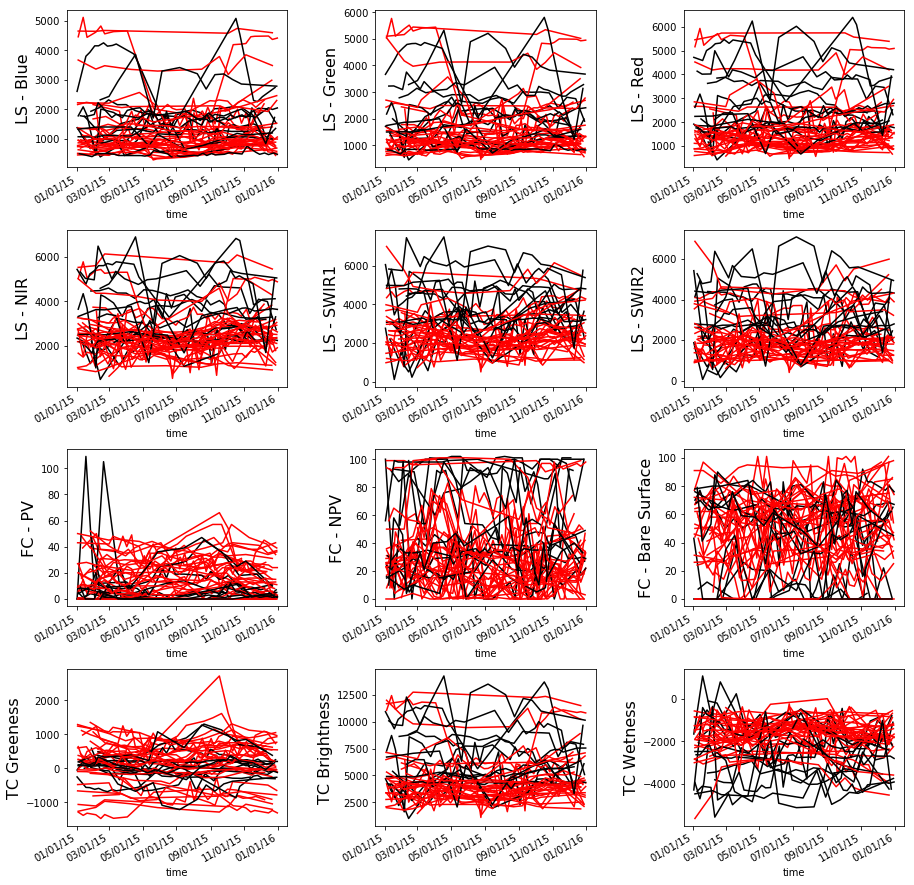

In [35]:
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(4,3)
gs.update(wspace=0.4, hspace=0.4)
# plt.suptitle(AOI, fontsize=24)

# LS - Blue
ax1=plt.subplot(gs[0,0])
ax1=Ayr_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Ayr_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Ayr_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Ayr_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Diamantina_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Gwydir_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Gwydir_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Gwydir_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Leichhardt_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Kakadu_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Kakadu_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Kakadu_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Hobart_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Hobart_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Hobart_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')

ax1=Perth_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Perth_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Perth_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Perth_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Murray_Valley_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Murray_Valley_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Murray_Valley_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Adelaide_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Adelaide_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Adelaide_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Adelaide_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Lake_Eyre_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Blue_Mtns_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Blue_Mtns_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Blue_Mtns_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')

ax1=Aust_Alps_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Aust_Alps_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Aust_Alps_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')

ax1=Collier_Range_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Coorong_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Coorong_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Coorong_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Coorong_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Brisbane_industrial_LS.blue.drop('x').drop('y').plot(color='red', label='industrial')
ax1=Brisbane_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Brisbane_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Brisbane_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=Mt_Ney_urban_LS.blue.drop('x').drop('y').plot(color='red', label='urban')
ax1=Mt_Ney_roads_LS.blue.drop('x').drop('y').plot(color='red', label='roads')
ax1=Mt_Ney_bare_LS.blue.drop('x').drop('y').plot(color='black', label='bare')

ax1=plt.ylabel('LS - Blue', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# LS - Green
ax2=plt.subplot(gs[0,1])
ax2=Ayr_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Ayr_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Ayr_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Ayr_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Diamantina_bare_LS.drop('x').drop('y').green.plot(color='black', label='bare')

ax2=Gwydir_urban_LS.drop('x').drop('y').green.plot(color='red', label='urban')
ax2=Gwydir_roads_LS.drop('x').drop('y').green.plot(color='red', label='roads')
ax2=Gwydir_bare_LS.drop('x').drop('y').green.plot(color='black', label='bare')

ax2=Leichhardt_bare_LS.drop('x').drop('y').green.plot(color='black', label='bare')

ax2=Kakadu_urban_LS.drop('x').drop('y').green.plot(color='red', label='urban')
ax2=Kakadu_roads_LS.drop('x').drop('y').green.plot(color='red', label='roads')
ax2=Kakadu_bare_LS.drop('x').drop('y').green.plot(color='black', label='bare')

ax2=Hobart_industrial_LS.drop('x').drop('y').green.plot(color='red', label='industrial')
ax2=Hobart_urban_LS.drop('x').drop('y').green.plot(color='red', label='urban')
ax2=Hobart_roads_LS.drop('x').drop('y').green.plot(color='red', label='roads')

ax2=Perth_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Perth_urban_LS.drop('x').drop('y').green.plot(color='red', label='urban')
ax2=Perth_roads_LS.drop('x').drop('y').green.plot(color='red', label='roads')
ax2=Perth_bare_LS.drop('x').drop('y').green.plot(color='black', label='bare')

ax2=Murray_Valley_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Murray_Valley_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Murray_Valley_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Adelaide_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Adelaide_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Adelaide_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Adelaide_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Lake_Eyre_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Blue_Mtns_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Blue_Mtns_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Blue_Mtns_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')

ax2=Aust_Alps_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Aust_Alps_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Aust_Alps_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')

ax2=Collier_Range_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Coorong_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Coorong_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Coorong_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Coorong_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Brisbane_industrial_LS.green.drop('x').drop('y').plot(color='red', label='industrial')
ax2=Brisbane_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Brisbane_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Brisbane_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=Mt_Ney_urban_LS.green.drop('x').drop('y').plot(color='red', label='urban')
ax2=Mt_Ney_roads_LS.green.drop('x').drop('y').plot(color='red', label='roads')
ax2=Mt_Ney_bare_LS.green.drop('x').drop('y').plot(color='black', label='bare')

ax2=plt.ylabel('LS - Green', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# LS - Red
ax3=plt.subplot(gs[0,2])
ax3=Ayr_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Ayr_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Ayr_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Ayr_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Diamantina_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Gwydir_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Gwydir_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Gwydir_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Leichhardt_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Kakadu_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Kakadu_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Kakadu_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Hobart_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Hobart_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Hobart_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')

ax3=Perth_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Perth_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Perth_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Perth_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Murray_Valley_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Murray_Valley_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Murray_Valley_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Adelaide_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Adelaide_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Adelaide_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Adelaide_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Lake_Eyre_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Blue_Mtns_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Blue_Mtns_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Blue_Mtns_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')

ax3=Aust_Alps_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Aust_Alps_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Aust_Alps_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')

ax3=Collier_Range_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Coorong_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Coorong_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Coorong_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Coorong_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Brisbane_industrial_LS.red.drop('x').drop('y').plot(color='red', label='industrial')
ax3=Brisbane_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Brisbane_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Brisbane_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=Mt_Ney_urban_LS.red.drop('x').drop('y').plot(color='red', label='urban')
ax3=Mt_Ney_roads_LS.red.drop('x').drop('y').plot(color='red', label='roads')
ax3=Mt_Ney_bare_LS.red.drop('x').drop('y').plot(color='black', label='bare')

ax3=plt.ylabel('LS - Red', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# LS - NIR
ax4=plt.subplot(gs[1,0])
ax4=Ayr_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Ayr_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Ayr_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Ayr_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Diamantina_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Gwydir_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Gwydir_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Gwydir_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Leichhardt_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Kakadu_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Kakadu_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Kakadu_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Hobart_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Hobart_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Hobart_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')

ax4=Perth_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Perth_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Perth_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Perth_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Murray_Valley_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Murray_Valley_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Murray_Valley_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Adelaide_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Adelaide_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Adelaide_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Adelaide_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Lake_Eyre_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Blue_Mtns_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Blue_Mtns_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Blue_Mtns_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')

ax4=Aust_Alps_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Aust_Alps_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Aust_Alps_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')

ax4=Collier_Range_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Coorong_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Coorong_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Coorong_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Coorong_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Brisbane_industrial_LS.nir.drop('x').drop('y').plot(color='red', label='industrial')
ax4=Brisbane_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Brisbane_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Brisbane_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=Mt_Ney_urban_LS.nir.drop('x').drop('y').plot(color='red', label='urban')
ax4=Mt_Ney_roads_LS.nir.drop('x').drop('y').plot(color='red', label='roads')
ax4=Mt_Ney_bare_LS.nir.drop('x').drop('y').plot(color='black', label='bare')

ax4=plt.ylabel('LS - NIR', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# LS - SWIR1
ax5=plt.subplot(gs[1,1])
ax5=Ayr_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Ayr_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Ayr_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Ayr_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Diamantina_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Gwydir_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Gwydir_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Gwydir_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Leichhardt_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Kakadu_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Kakadu_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Kakadu_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Hobart_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Hobart_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Hobart_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')

ax5=Perth_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Perth_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Perth_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Perth_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Murray_Valley_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Murray_Valley_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Murray_Valley_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Adelaide_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Adelaide_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Adelaide_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Adelaide_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Lake_Eyre_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Blue_Mtns_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Blue_Mtns_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Blue_Mtns_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')

ax5=Aust_Alps_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Aust_Alps_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Aust_Alps_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')

ax5=Collier_Range_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Coorong_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Coorong_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Coorong_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Coorong_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Brisbane_industrial_LS.swir1.drop('x').drop('y').plot(color='red', label='industrial')
ax5=Brisbane_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Brisbane_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Brisbane_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=Mt_Ney_urban_LS.swir1.drop('x').drop('y').plot(color='red', label='urban')
ax5=Mt_Ney_roads_LS.swir1.drop('x').drop('y').plot(color='red', label='roads')
ax5=Mt_Ney_bare_LS.swir1.drop('x').drop('y').plot(color='black', label='bare')

ax5=plt.ylabel('LS - SWIR1', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# LS - SWIR2
ax6=plt.subplot(gs[1,2])
ax6=Ayr_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Ayr_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Ayr_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Ayr_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Diamantina_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Gwydir_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Gwydir_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Gwydir_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Leichhardt_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Kakadu_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Kakadu_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Kakadu_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Hobart_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Hobart_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Hobart_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')

ax6=Perth_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Perth_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Perth_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Perth_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Murray_Valley_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Murray_Valley_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Murray_Valley_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Adelaide_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Adelaide_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Adelaide_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Adelaide_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Lake_Eyre_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Blue_Mtns_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Blue_Mtns_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Blue_Mtns_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')

ax6=Aust_Alps_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Aust_Alps_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Aust_Alps_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')

ax6=Collier_Range_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Coorong_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Coorong_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Coorong_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Coorong_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Brisbane_industrial_LS.swir2.drop('x').drop('y').plot(color='red', label='industrial')
ax6=Brisbane_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Brisbane_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Brisbane_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=Mt_Ney_urban_LS.swir2.drop('x').drop('y').plot(color='red', label='urban')
ax6=Mt_Ney_roads_LS.swir2.drop('x').drop('y').plot(color='red', label='roads')
ax6=Mt_Ney_bare_LS.swir2.drop('x').drop('y').plot(color='black', label='bare')

ax6=plt.ylabel('LS - SWIR2', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# PV
ax7=plt.subplot(gs[2,0])
ax7=Ayr_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Ayr_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Ayr_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Ayr_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Diamantina_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Gwydir_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Gwydir_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Gwydir_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Leichhardt_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Kakadu_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Kakadu_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Kakadu_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Hobart_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Hobart_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Hobart_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Perth_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Perth_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Perth_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Perth_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Murray_Valley_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Murray_Valley_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Murray_Valley_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Adelaide_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Adelaide_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Adelaide_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Adelaide_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Lake_Eyre_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Blue_Mtns_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Blue_Mtns_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Blue_Mtns_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Aust_Alps_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Aust_Alps_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Aust_Alps_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Collier_Range_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Coorong_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Coorong_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Coorong_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Coorong_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Brisbane_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Brisbane_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Brisbane_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Brisbane_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Mt_Ney_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Mt_Ney_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Mt_Ney_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')


ax7=plt.ylabel('FC - PV', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# NPV
ax8=plt.subplot(gs[2,1])
ax8=Ayr_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Ayr_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Ayr_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Ayr_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Diamantina_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Gwydir_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Gwydir_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Gwydir_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Leichhardt_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Kakadu_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Kakadu_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Kakadu_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Hobart_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Hobart_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Hobart_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Perth_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Perth_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Perth_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Perth_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Murray_Valley_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Murray_Valley_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Murray_Valley_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Adelaide_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Adelaide_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Adelaide_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Adelaide_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Lake_Eyre_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Blue_Mtns_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Blue_Mtns_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Blue_Mtns_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Aust_Alps_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Aust_Alps_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Aust_Alps_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Collier_Range_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Coorong_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Coorong_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Coorong_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Coorong_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Brisbane_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Brisbane_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Brisbane_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Brisbane_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Mt_Ney_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Mt_Ney_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Mt_Ney_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=plt.ylabel('FC - NPV', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# BS
ax9=plt.subplot(gs[2,2])
ax9=Ayr_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Ayr_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Ayr_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Ayr_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Diamantina_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Gwydir_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Gwydir_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Gwydir_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Leichhardt_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Kakadu_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Kakadu_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Kakadu_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Hobart_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Hobart_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Hobart_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Perth_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Perth_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Perth_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Perth_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Murray_Valley_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Murray_Valley_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Murray_Valley_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Adelaide_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Adelaide_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Adelaide_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Adelaide_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Lake_Eyre_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Blue_Mtns_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Blue_Mtns_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Blue_Mtns_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Aust_Alps_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Aust_Alps_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Aust_Alps_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Collier_Range_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Coorong_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Coorong_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Coorong_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Coorong_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Brisbane_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Brisbane_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Brisbane_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Brisbane_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Mt_Ney_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Mt_Ney_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Mt_Ney_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=plt.ylabel('FC - Bare Surface', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# TCG
ax10=plt.subplot(gs[3,0])
ax10=Ayr_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Ayr_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Ayr_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Ayr_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Diamantina_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Gwydir_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Gwydir_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Gwydir_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Leichhardt_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Kakadu_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Kakadu_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Kakadu_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Hobart_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Hobart_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Hobart_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')

ax10=Perth_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Perth_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Perth_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Perth_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Murray_Valley_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Murray_Valley_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Murray_Valley_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Adelaide_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Adelaide_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Adelaide_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Adelaide_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Lake_Eyre_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Blue_Mtns_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Blue_Mtns_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Blue_Mtns_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')

ax10=Aust_Alps_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Aust_Alps_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Aust_Alps_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')

ax10=Collier_Range_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Coorong_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Coorong_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Coorong_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Coorong_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Brisbane_industrial_TC.greenness.drop('x').drop('y').plot(color='red', label='industrial')
ax10=Brisbane_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Brisbane_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Brisbane_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=Mt_Ney_urban_TC.greenness.drop('x').drop('y').plot(color='red', label='urban')
ax10=Mt_Ney_roads_TC.greenness.drop('x').drop('y').plot(color='red', label='roads')
ax10=Mt_Ney_bare_TC.greenness.drop('x').drop('y').plot(color='black', label='bare')

ax10=plt.ylabel('TC Greeness', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# TCB
ax11=plt.subplot(gs[3,1])
ax11=Ayr_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Ayr_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Ayr_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Ayr_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Diamantina_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Gwydir_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Gwydir_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Gwydir_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Leichhardt_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Kakadu_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Kakadu_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Kakadu_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Hobart_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Hobart_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Hobart_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')

ax11=Perth_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Perth_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Perth_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Perth_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Murray_Valley_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Murray_Valley_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Murray_Valley_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Adelaide_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Adelaide_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Adelaide_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Adelaide_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Lake_Eyre_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Blue_Mtns_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Blue_Mtns_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Blue_Mtns_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')

ax11=Aust_Alps_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Aust_Alps_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Aust_Alps_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')

ax11=Collier_Range_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Coorong_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Coorong_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Coorong_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Coorong_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Brisbane_industrial_TC.brightness.drop('x').drop('y').plot(color='red', label='industrial')
ax11=Brisbane_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Brisbane_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Brisbane_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')

ax11=Mt_Ney_urban_TC.brightness.drop('x').drop('y').plot(color='red', label='urban')
ax11=Mt_Ney_roads_TC.brightness.drop('x').drop('y').plot(color='red', label='roads')
ax11=Mt_Ney_bare_TC.brightness.drop('x').drop('y').plot(color='black', label='bare')


ax11=plt.ylabel('TC Brightness', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# TCW
ax12=plt.subplot(gs[3,2])
ax12=Ayr_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Ayr_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Ayr_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Ayr_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Diamantina_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Gwydir_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Gwydir_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Gwydir_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Leichhardt_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Kakadu_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Kakadu_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Kakadu_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Hobart_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Hobart_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Hobart_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')

ax12=Perth_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Perth_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Perth_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Perth_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Murray_Valley_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Murray_Valley_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Murray_Valley_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Adelaide_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Adelaide_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Adelaide_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Adelaide_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Lake_Eyre_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Blue_Mtns_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Blue_Mtns_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Blue_Mtns_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')

ax12=Aust_Alps_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Aust_Alps_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Aust_Alps_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')

ax12=Collier_Range_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Coorong_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Coorong_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Coorong_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Coorong_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Brisbane_industrial_TC.wetness.drop('x').drop('y').plot(color='red', label='industrial')
ax12=Brisbane_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Brisbane_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Brisbane_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=Mt_Ney_urban_TC.wetness.drop('x').drop('y').plot(color='red', label='urban')
ax12=Mt_Ney_roads_TC.wetness.drop('x').drop('y').plot(color='red', label='roads')
ax12=Mt_Ney_bare_TC.wetness.drop('x').drop('y').plot(color='black', label='bare')

ax12=plt.ylabel('TC Wetness', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.legend().set_visible(False)

# plt.legend(loc='upper center', bbox_to_anchor=(-1, 5.6), fancybox=True, shadow=True, ncol=6, fontsize=16)
plt.show()






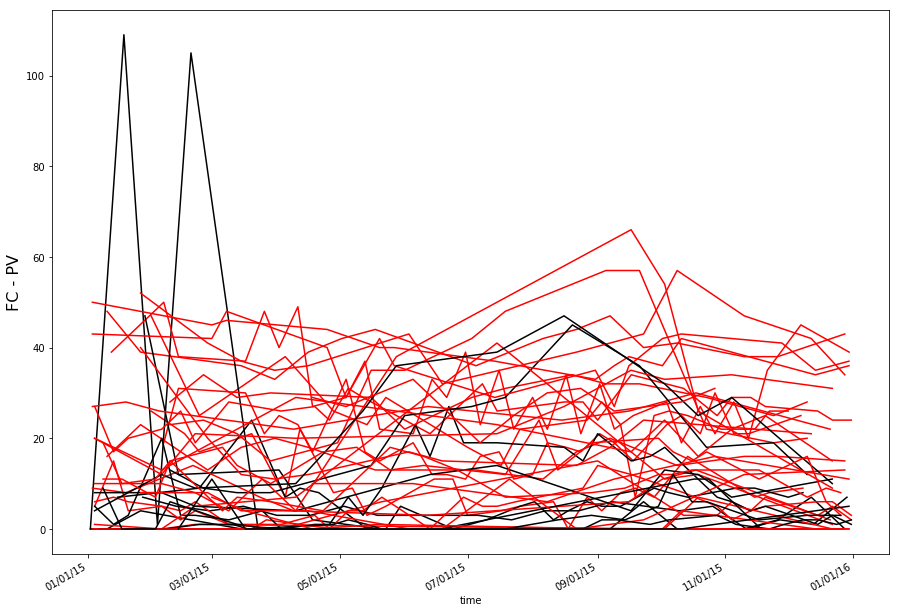

In [40]:
plt.figure(figsize=(15,10))
# PV
ax7=plt.subplot()
ax7=Ayr_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Ayr_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Ayr_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Ayr_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Diamantina_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Gwydir_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Gwydir_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Gwydir_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Leichhardt_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Kakadu_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Kakadu_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Kakadu_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Hobart_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Hobart_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Hobart_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Perth_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Perth_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Perth_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Perth_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Murray_Valley_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Murray_Valley_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Murray_Valley_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Adelaide_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Adelaide_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Adelaide_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Adelaide_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Lake_Eyre_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Blue_Mtns_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Blue_Mtns_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Blue_Mtns_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Aust_Alps_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Aust_Alps_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Aust_Alps_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')

ax7=Collier_Range_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Coorong_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Coorong_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Coorong_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Coorong_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Brisbane_industrial_FC.PV.drop('x').drop('y').plot(color='red', label='industrial')
ax7=Brisbane_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Brisbane_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Brisbane_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')

ax7=Mt_Ney_urban_FC.PV.drop('x').drop('y').plot(color='red', label='urban')
ax7=Mt_Ney_roads_FC.PV.drop('x').drop('y').plot(color='red', label='roads')
ax7=Mt_Ney_bare_FC.PV.drop('x').drop('y').plot(color='black', label='bare')


ax7=plt.ylabel('FC - PV', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()


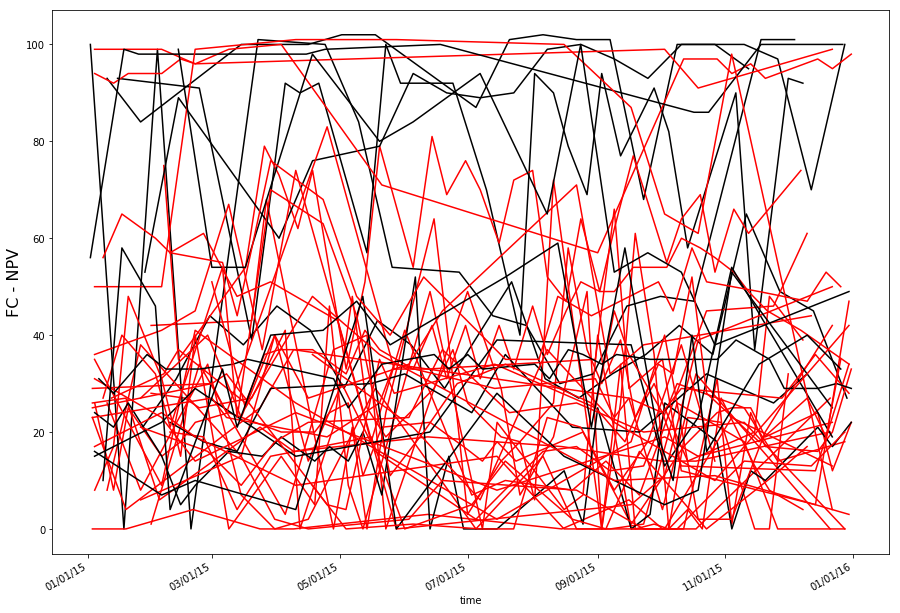

In [41]:
plt.figure(figsize=(15,10))
# NPV
ax8=plt.subplot()
ax8=Ayr_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Ayr_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Ayr_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Ayr_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Diamantina_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Gwydir_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Gwydir_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Gwydir_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Leichhardt_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Kakadu_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Kakadu_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Kakadu_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Hobart_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Hobart_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Hobart_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Perth_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Perth_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Perth_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Perth_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Murray_Valley_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Murray_Valley_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Murray_Valley_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Adelaide_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Adelaide_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Adelaide_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Adelaide_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Lake_Eyre_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Blue_Mtns_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Blue_Mtns_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Blue_Mtns_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Aust_Alps_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Aust_Alps_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Aust_Alps_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')

ax8=Collier_Range_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Coorong_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Coorong_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Coorong_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Coorong_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Brisbane_industrial_FC.NPV.drop('x').drop('y').plot(color='red', label='industrial')
ax8=Brisbane_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Brisbane_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Brisbane_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=Mt_Ney_urban_FC.NPV.drop('x').drop('y').plot(color='red', label='urban')
ax8=Mt_Ney_roads_FC.NPV.drop('x').drop('y').plot(color='red', label='roads')
ax8=Mt_Ney_bare_FC.NPV.drop('x').drop('y').plot(color='black', label='bare')

ax8=plt.ylabel('FC - NPV', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()

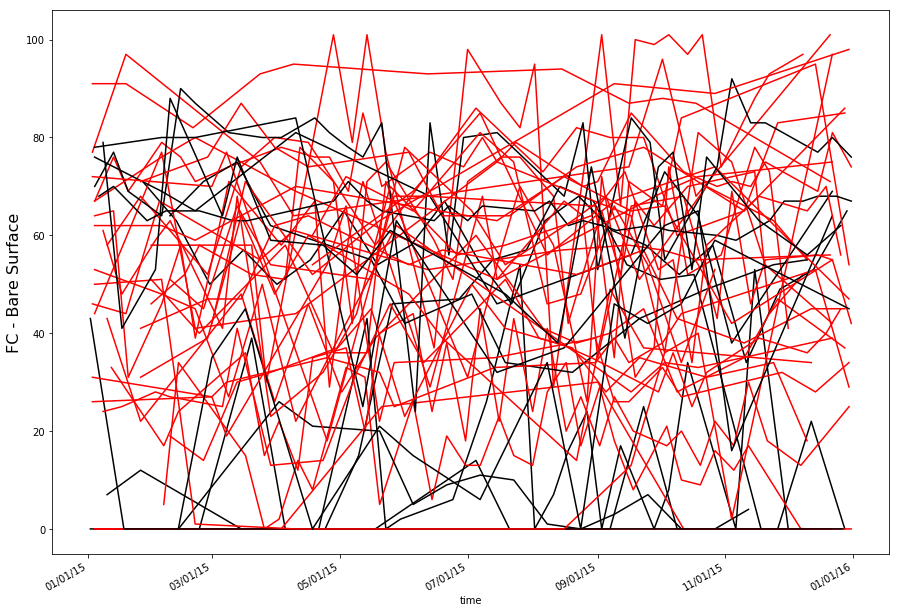

In [42]:
plt.figure(figsize=(15,10))
# BS
ax9=plt.subplot()
ax9=Ayr_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Ayr_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Ayr_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Ayr_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Diamantina_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Gwydir_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Gwydir_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Gwydir_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Leichhardt_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Kakadu_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Kakadu_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Kakadu_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Hobart_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Hobart_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Hobart_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Perth_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Perth_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Perth_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Perth_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Murray_Valley_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Murray_Valley_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Murray_Valley_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Adelaide_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Adelaide_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Adelaide_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Adelaide_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Lake_Eyre_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Blue_Mtns_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Blue_Mtns_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Blue_Mtns_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Aust_Alps_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Aust_Alps_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Aust_Alps_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')

ax9=Collier_Range_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Coorong_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Coorong_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Coorong_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Coorong_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Brisbane_industrial_FC.BS.drop('x').drop('y').plot(color='red', label='industrial')
ax9=Brisbane_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Brisbane_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Brisbane_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=Mt_Ney_urban_FC.BS.drop('x').drop('y').plot(color='red', label='urban')
ax9=Mt_Ney_roads_FC.BS.drop('x').drop('y').plot(color='red', label='roads')
ax9=Mt_Ney_bare_FC.BS.drop('x').drop('y').plot(color='black', label='bare')

ax9=plt.ylabel('FC - Bare Surface', fontsize=16)
years = mdates.MonthLocator(interval=2)
yearsFmt = mdates.DateFormatter('%D')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()

In [45]:
# Indices
# NDBI = ((LS.swir1 - LS.nir)/(LS.swir1 + LS.nir))

# NDBI
# ax1=plt.subplot(gs[0,0])
# ax1=plt.plot(NDBI.time, NDBI.sel(urban, method='nearest'), 'ro-', label='urban')
# ax1=plt.plot(NDBI.time, NDBI.sel(industrial, method='nearest'), 'bo-', label='industrial')
# ax1=plt.plot(NDBI.time, NDBI.sel(bare, method='nearest'), 'ko-', label='bare')
# ax1=plt.plot(NDBI.time, NDBI.sel(mine, method='nearest'), 'yo-', label='mine')
# ax1=plt.plot(NDBI.time, NDBI.sel(veg, method='nearest'), 'go-', label='veg')
# ax1=plt.plot(NDBI.time, NDBI.sel(crops, method='nearest'), 'co-', label='crops')
# ax1=plt.xlabel(Date, fontsize=16)
# ax1=plt.ylabel('NDBI', fontsize=16)
# years = mdates.MonthLocator(interval=4)
# yearsFmt = mdates.DateFormatter('%D')
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)

In [14]:
# plt.savefig(str(AOI)+'_'+str(Date)+'_temporal_analysis.pdf')

<Figure size 432x288 with 0 Axes>